In [1]:
import numpy as np
import cv2
import easyocr
import matplotlib.pyplot as plt
from PlateDetector import PlateDetector
from Plate import Plate
%matplotlib inline

In [2]:
pd = PlateDetector(r"C:\Users\iperkins\Develop\LicensePlateReader\models\plates_yolov5n.onnx", 640)
ocr = easyocr.Reader(["en"])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


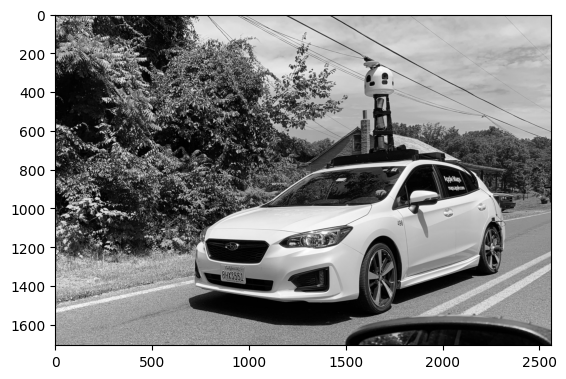

In [3]:
img_path = r"C:\Users\iperkins\Develop\LicensePlateReader\data\car04.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
img_height, img_width = img.shape[:2]
pd.SetImageSize(img_width, img_height)
plates = pd.Predict(img)

In [5]:
plates

array([License Plate (848, 1311) (992, 1391)  83.72%,
       License Plate (848, 1311) (991, 1391)  80.35%,
       License Plate (851, 1309) (992, 1391)  75.75%,
       License Plate (850, 1308) (992, 1392)  82.88%,
       License Plate (848, 1310) (991, 1390)  74.88%,
       License Plate (851, 1309) (992, 1390)  72.61%,
       License Plate (849, 1308) (991, 1391)  81.58%,
       License Plate (848, 1310) (991, 1390)  74.83%,
       License Plate (850, 1308) (995, 1390)  70.86%,
       License Plate (850, 1306) (995, 1391)  74.25%,
       License Plate (848, 1308) (994, 1392)  77.73%], dtype=object)

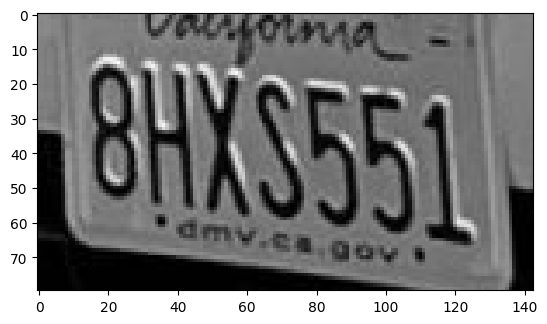

In [6]:
plate = plates[4]
cropped_plate = img[plate.y1: plate.y2, plate.x1:plate.x2]
plt.imshow(cropped_plate)
plt.show()

In [ ]:
ocr.readtext(cropped_plate)

[([[36, 0], [109, 0], [109, 15], [36, 15]], "'cotma_", 0.037702420501083876),
 ([[10.951362344004036, -1.921008529573366],
   [139.7385565810773, 18.10478096157201],
   [128.04863765599598, 77.92100852957337],
   [-1.738556581077293, 57.89521903842799]],
  '8HXS551 |',
  0.19650466909212108)]

License Plate  83.72%
Ma


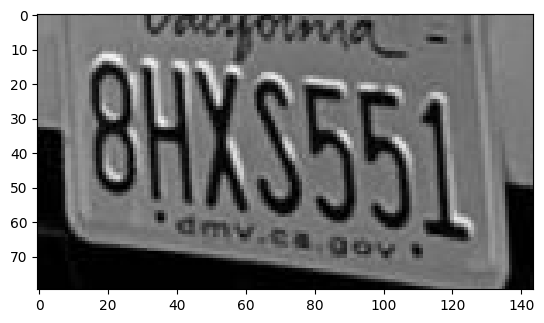

License Plate  80.35%
Ma


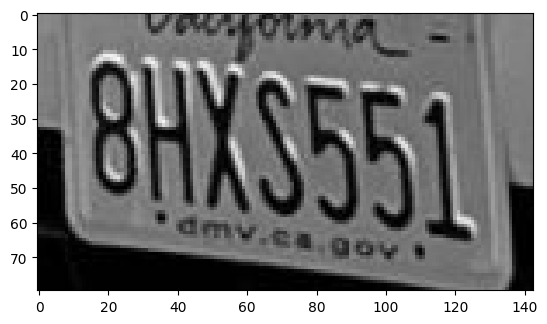

License Plate  75.75%
VN ona


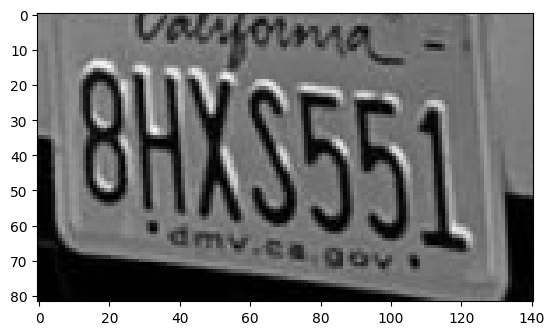

License Plate  82.88%
UNaona 


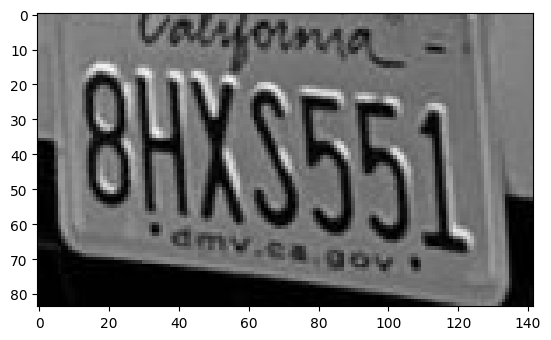

License Plate  74.88%
'cotma_


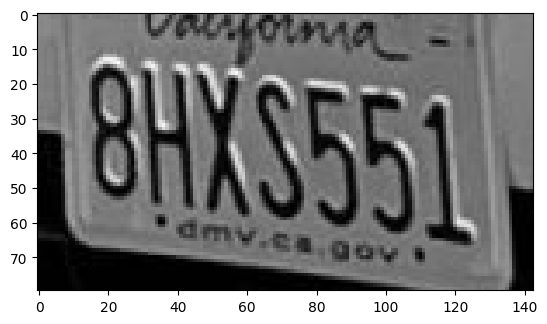

License Plate  72.61%
VN ona


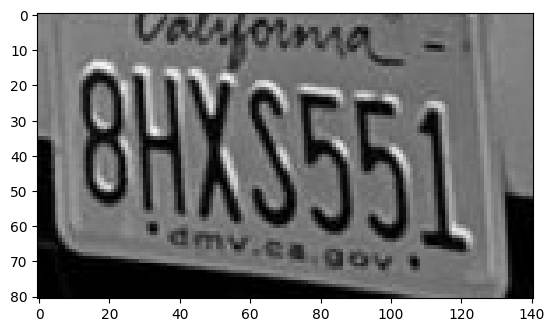

License Plate  81.58%
Vcuot+a


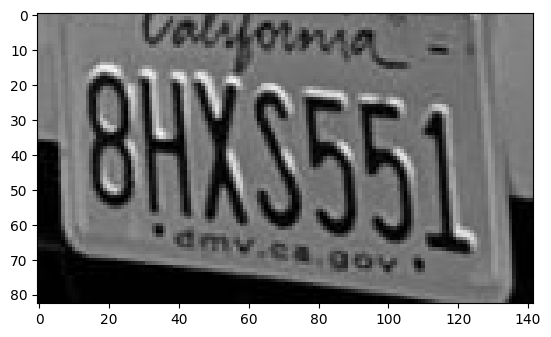

License Plate  74.83%
'cotma_


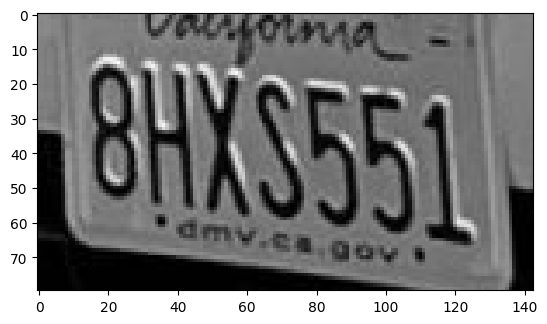

License Plate  70.86%
UNaona 


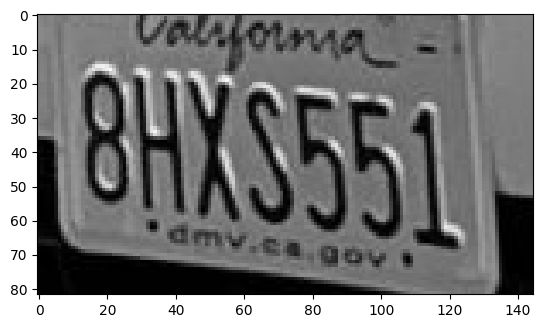

License Plate  74.25%
Vasotma


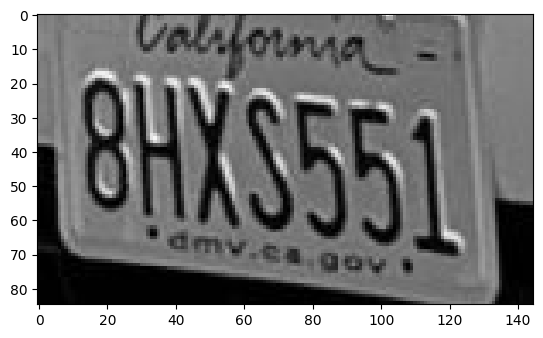

License Plate  77.73%
UNaona 


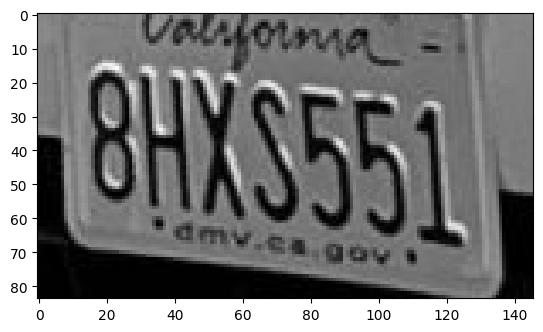

In [ ]:
for plate in plates:
    cropped_plate = img[plate.y1: plate.y2, plate.x1:plate.x2]
    print(plate)
    print(ocr.readtext(cropped_plate)[0][1])
    plt.imshow(cropped_plate)
    plt.show()